<a href="https://colab.research.google.com/github/christopher-reed/tidytuesday/blob/master/2020/week_48/TidyTuesday_Washington_Trails.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read in packages and data

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Arc

**The data provided this week came in .rds format. Since I'm using Python, I had to read in the data in R, drop the columns containing vectors, and then save as a csv.**

In [41]:
df = pd.read_csv('/content/hike_data.csv', encoding='cp1252')

# Cleaning

In [62]:
# Drop first column (forgot to save csv with row.names = F)
df_clean = df.drop(columns = 'Unnamed: 0')

####################
##EXTRACT DISTANCE##
####################

df_clean['distance'] = df_clean['length'].str.split(',').str[0]

df_clean['distance'] = df_clean['distance'].str.split(' ').str[0]

df_clean['distance'] = df_clean['distance'].astype(float)

#######################################
##ONLY INTERESTED IN ROUNDTRIP TRAILS##
#######################################

df_roundtrip = df_clean[df_clean['length'].str.contains('roundtrip')]

# Plotting

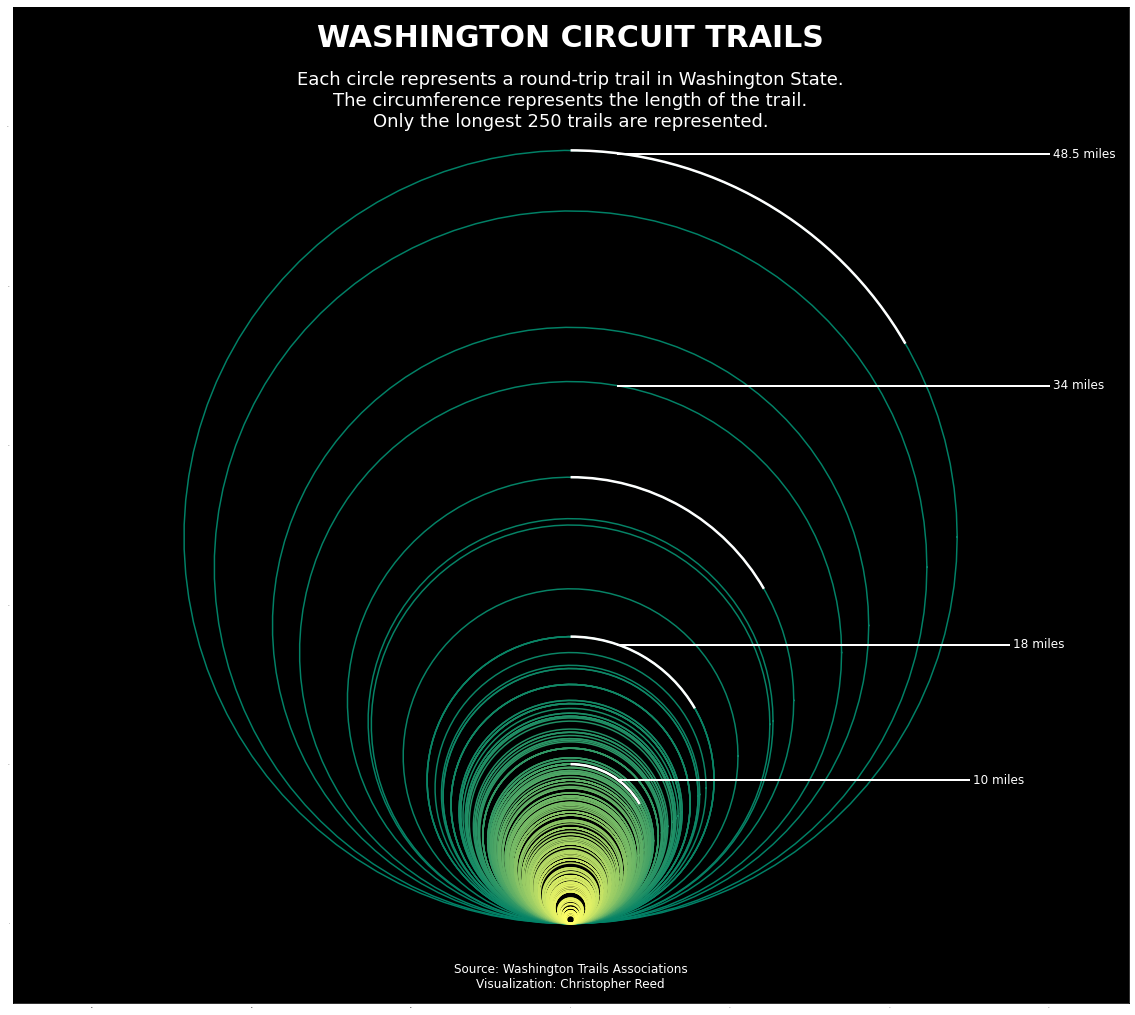

In [215]:
############
##PREP WORK##
#############

# Sort df by distance and get the top 250.
df_roundtrip_sort = df_roundtrip.sort_values(by = 'distance',
                                             ascending = False).head(250)
# Top 250 distances as a list
sorted_distances = df_roundtrip_sort['distance'].to_list()

# Colormap that has the same length as there are distances
color = iter(cm.summer(np.linspace(0,1, len(sorted_distances))))

# Define theta for circles
theta = np.linspace(0, 2*np.pi, 100)

###################
##FIGURE AND AXES##
###################

# Create figure and ax
fig, ax = plt.subplots(figsize = (20,20))

##################
##CREATE CIRCLES##
##################

# Iterate through distances using them as the radius of circles
for i in sorted_distances:

  # Iter colors
  c = next(color)

  # Define radius
  radius = i

  # Parametric equation for circle
  a = radius*np.cos(theta)
  b = radius*np.sin(theta)

  # Plot cirlce. Adjust b by radius so all circles line up on the bottom
  ax.plot(a, b + radius, color = c)

##############
#CREATE ARCS##
##############

# Index positions of values in sorted_distances list.
for radius in [sorted_distances[56], sorted_distances[8] , sorted_distances[4], sorted_distances[0]]:

  ax.add_patch(Arc((0, radius),
                   radius*2,
                   radius*2,
                   theta1 = 30,
                   theta2= 90,
                   lw = 2.5,
                   edgecolor='white',
                   zorder = 10))


# 10 mile arc
ax.plot([6, 50], [18, 18], lw = 2, color ='white')
ax.text(50.5, 18,
        '10 miles',
        fontsize = 12,
        ha = 'left',
        va = 'center',
        color = 'white')

# 18 mile arc
ax.plot([6, 55], [35, 35], lw = 2, color = 'white')
ax.text(55.5, 35,
        '18 miles',
        fontsize = 12,
        ha = 'left',
        va = 'center',
        color = 'white')

# 34 mile arc
ax.plot([6, 60], [67.5, 67.5], lw = 2, color = 'white')
ax.text(60.5, 67.5,
        '34 miles',
        fontsize = 12,
        ha = 'left',
        va = 'center',
        color = 'white')

# 48.5 mile arc
ax.plot([6, 60], [96.5, 96.5], lw = 2, color = 'white')
ax.text(60.5, 96.5,
        '48.5 miles',
        fontsize = 12,
        ha = 'left',
        va = 'center',
        color = 'white')

###############
##AXIS LIMITS##
###############

ax.set_ylim(bottom = -10,
            top = 115)

ax.set_xlim(left = -70,
            right = 70)

########
##TEXT##
########

# Main title
ax.text(0, 110,
        'WASHINGTON CIRCUIT TRAILS',
        fontsize = 30,
        ha = 'center',
        weight = 'bold',
        color = 'white')

# Subtitle
ax.text(0, 100,
        'Each circle represents a round-trip trail in Washington State.\nThe circumference represents the length of the trail.\nOnly the longest 250 trails are represented.',
        fontsize = 18,
        ha = 'center',
        color = 'white')

# Credits
ax.text(0, -8,
        'Source: Washington Trails Associations\nVisualization: Christopher Reed',
        fontsize = 12,
        color = 'white',
        ha = 'center')

#################
##FINAL TOUCHES##
#################

# Set aspect so circles aren't elipses
ax.set_aspect(1)

# Facecolor
ax.set_facecolor('black')

# Remove tick marks
ax.tick_params(length = 0,
               labelsize = 0)

# Save!
plt.savefig('washington_trails.jpg',
            bbox_inches = 'tight')